# Imports

In [43]:
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Load data
Dimensions: [16, 64, 1]

Simply Supported coundary conditions

In [90]:
# retrieve pressure image
with open("simply_pressure_in", 'rb') as data:
  X_simply = pickle.load(data)

# retrieve velocity ground truth image
with open("simply_velocity_gt", 'rb') as data:
  GT_simply = pickle.load(data)

Clamped boundary conditions

In [91]:
# retrieve pressure image
with open("clamped_pressure_in", 'rb') as data:
  X_clamped = pickle.load(data)

# retrieve velocity ground truth image
with open("clamped_velocity_gt", 'rb') as data:
  GT_clamped = pickle.load(data)

Free boundary conditions

In [92]:
# retrieve pressure image
with open("free_pressure_in", 'rb') as data:
  X_free = pickle.load(data)

# retrieve velocity ground truth image
with open("free_velocity_gt", 'rb') as data:
  GT_free = pickle.load(data)

# Metrics definition

Normalized Cross Correlation

In [93]:
def nccMetric(out, gt):
  ''' 
    out: ndarray image prediction
    gt: ndarray image ground truth
    returns -> normalized cross correlation
  '''
  numerator = np.sum(out.reshape(16,64) * gt.reshape(16,64))
  a = np.sqrt(np.sum(np.power(out.reshape(16,64), 2)))
  b = np.sqrt(np.sum(np.power(gt.reshape(16,64), 2)))
  denominator = a * b

  return numerator/denominator

Normalized Mean Square Error

In [94]:
def nmseMetric(out, gt):
  ''' 
    out: ndarray image prediction
    gt: ndarray image ground truth
    returns -> normalized mean square error in dB
  '''
  prediction_img = out.reshape(16,64)
  groundtruth_img = gt.reshape(16,64)
  
  numerator = mean_squared_error(prediction_img, groundtruth_img)
  denominator = mean_squared_error(groundtruth_img, np.zeros(groundtruth_img.shape))

  return 10*np.log10(numerator/denominator)

# Noiseless validation

## Load model & weights

In [95]:
model = keras.models.load_model("weights_clean.h5", compile=True)

## Simply Supported boundary condition

Prediction

In [96]:
OUT_simply = model.predict(X_simply.reshape(1,16,64,1))[0]

Metrics evaluation

In [97]:
ncc_simply = nccMetric(OUT_simply, GT_simply)
nmse_simply = nmseMetric(OUT_simply, GT_simply)

print("NCC = ", ncc_simply)
print("NMSE(dB) = ", nmse_simply)

NCC =  0.9998840708910808
NMSE(dB) =  -36.28713053511174


View output

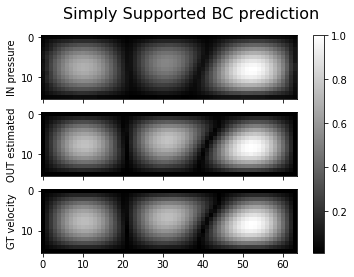

In [98]:
fig = plt.figure()
fig.suptitle("Simply Supported BC prediction", fontsize=16)

# IN
ax1 = plt.subplot(3, 1, 1)
first = plt.imshow(X_simply.reshape(16, 64))
plt.ylabel("IN pressure")
plt.gray()

# OUT
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
plt.imshow(OUT_simply.reshape(16, 64))
plt.ylabel("OUT estimated")
plt.gray()

# GT
ax3 = plt.subplot(3, 1, 3, sharex=ax2)
plt.imshow(GT_simply.reshape(16, 64))
plt.ylabel("GT velocity")
plt.gray()

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
fig.colorbar(first, ax=[ax1, ax2, ax3])

plt.show()

## Clamped boundary condition

Prediction

In [99]:
OUT_clamped = model.predict(X_clamped.reshape(1,16,64,1))

Metrics evaluation

In [100]:
ncc_clamped = nccMetric(OUT_clamped, GT_clamped)
nmse_clamped = nmseMetric(OUT_clamped, GT_clamped)

print("NCC = ", ncc_clamped)
print("NMSE(dB) = ", nmse_clamped)

NCC =  0.9997582227982531
NMSE(dB) =  -31.920904021547017


View output

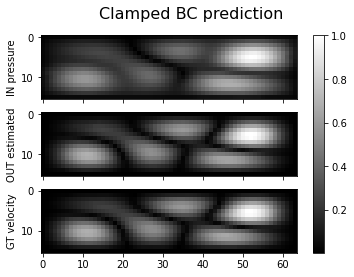

In [101]:
fig = plt.figure()
fig.suptitle("Clamped BC prediction", fontsize=16)

# IN
ax1 = plt.subplot(3, 1, 1)
first = plt.imshow(X_clamped.reshape(16, 64))
plt.ylabel("IN pressure")
plt.gray()

# OUT
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
plt.imshow(OUT_clamped.reshape(16, 64))
plt.ylabel("OUT estimated")
plt.gray()

# GT
ax3 = plt.subplot(3, 1, 3, sharex=ax2)
plt.imshow(GT_clamped.reshape(16, 64))
plt.ylabel("GT velocity")
plt.gray()

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
fig.colorbar(first, ax=[ax1, ax2, ax3])

plt.show()

## Free boundary condition

Prediction

In [102]:
OUT_free = model.predict(X_free.reshape(1,16,64,1))

Metrics evaluation

In [103]:
ncc_free = nccMetric(OUT_free, GT_free)
nmse_free = nmseMetric(OUT_free, GT_free)

print("NCC = ", ncc_free)
print("NMSE(dB) = ", nmse_free)

NCC =  0.9996644783670934
NMSE(dB) =  -30.155348910272085


View output

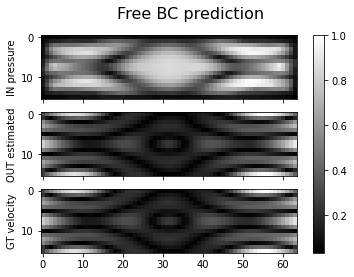

In [104]:
fig = plt.figure()
fig.suptitle("Free BC prediction", fontsize=16)

# IN
ax1 = plt.subplot(3, 1, 1)
first = plt.imshow(X_free.reshape(16, 64))
plt.ylabel("IN pressure")
plt.gray()

# OUT
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
plt.imshow(OUT_free.reshape(16, 64))
plt.ylabel("OUT estimated")
plt.gray()

# GT
ax3 = plt.subplot(3, 1, 3, sharex=ax2)
plt.imshow(GT_free.reshape(16, 64))
plt.ylabel("GT velocity")
plt.gray()

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
fig.colorbar(first, ax=[ax1, ax2, ax3])

plt.show()

# Additive noise validation

## Additive white noise

Define additive white noise

In [125]:
def add_noise(img, snr_dB):
    ''' 
    img: ndarray clean image
    snr: +dB
    returns -> noisy image as np.ndarray
    '''
    img = img.reshape(16, 64)

    # convert SNR from dB to num
    snr = 10.0 ** (snr_dB / 10.0)

    # Generate the noise
    noise = np.random.random(img.size).reshape(img.shape)
    
    # work out the current SNR
    current_snr = np.mean(img) / np.std(noise)
    
    # scale the noise by the snr ratios (smaller noise <=> larger snr)
    noise *= (current_snr / snr)

    # add noise and normalize
    noisy_img = img + noise
    noisy_img = noisy_img/np.max(noisy_img)

    return noisy_img.reshape(16, 64, 1)

Build noisy pressure images with specific SNR

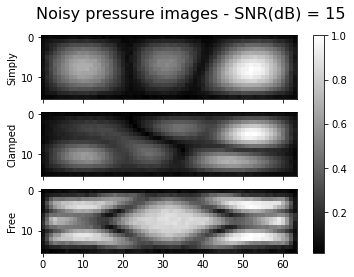

In [131]:
snr_dB = 15

X_simply_noisy = add_noise(X_simply, snr_dB)
X_clamped_noisy = add_noise(X_clamped, snr_dB)
X_free_noisy = add_noise(X_free, snr_dB)

fig = plt.figure()
fig.suptitle("Noisy pressure images - SNR(dB) = "+str(snr_dB), fontsize=16)

# IN
ax1 = plt.subplot(3, 1, 1)
first = plt.imshow(X_simply_noisy.reshape(16, 64))
plt.ylabel("Simply")
plt.gray()

# OUT
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
plt.imshow(X_clamped_noisy.reshape(16, 64))
plt.ylabel("Clamped")
plt.gray()

# GT
ax3 = plt.subplot(3, 1, 3, sharex=ax2)
plt.imshow(X_free_noisy.reshape(16, 64))
plt.ylabel("Free")
plt.gray()

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
fig.colorbar(first, ax=[ax1, ax2, ax3])

plt.show()

## Load model & weights

In [127]:
model = keras.models.load_model("weigths_noise40SNR.h5", compile=True)

## Simply Supported boundary condition

Prediction

In [132]:
OUT_simply_noisy = model.predict(X_simply_noisy.reshape(1,16,64,1))[0]

Metrics evaluation

In [133]:
ncc_simply_noisy = nccMetric(OUT_simply_noisy, GT_simply)
nmse_simply_noisy = nmseMetric(OUT_simply_noisy, GT_simply)

print("NCC = ", ncc_simply_noisy)
print("NMSE(dB) = ", nmse_simply_noisy)

NCC =  0.9997156606277069
NMSE(dB) =  -32.237519485171745


View output

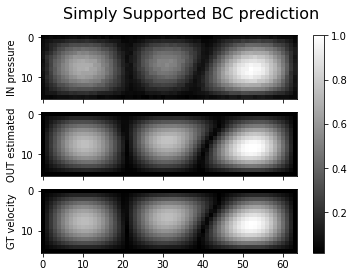

In [134]:
fig = plt.figure()
fig.suptitle("Simply Supported BC prediction", fontsize=16)

# IN
ax1 = plt.subplot(3, 1, 1)
first = plt.imshow(X_simply_noisy.reshape(16, 64))
plt.ylabel("IN pressure")
plt.gray()

# OUT
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
plt.imshow(OUT_simply_noisy.reshape(16, 64))
plt.ylabel("OUT estimated")
plt.gray()

# GT
ax3 = plt.subplot(3, 1, 3, sharex=ax2)
plt.imshow(GT_simply.reshape(16, 64))
plt.ylabel("GT velocity")
plt.gray()

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
fig.colorbar(first, ax=[ax1, ax2, ax3])

plt.show()

## Clamped boundary condition

Prediction

In [135]:
OUT_clamped_noisy = model.predict(X_clamped_noisy.reshape(1,16,64,1))

Metrics evaluation

In [136]:
ncc_clamped_noisy = nccMetric(OUT_clamped_noisy, GT_clamped)
nmse_clamped_noisy = nmseMetric(OUT_clamped_noisy, GT_clamped)

print("NCC = ", ncc_clamped_noisy)
print("NMSE(dB) = ", nmse_clamped_noisy)

NCC =  0.9996120712870673
NMSE(dB) =  -31.078174554122775


View output

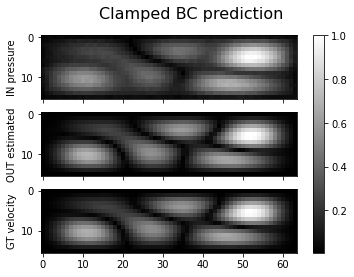

In [137]:
fig = plt.figure()
fig.suptitle("Clamped BC prediction", fontsize=16)

# IN
ax1 = plt.subplot(3, 1, 1)
first = plt.imshow(X_clamped_noisy.reshape(16, 64))
plt.ylabel("IN pressure")
plt.gray()

# OUT
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
plt.imshow(OUT_clamped_noisy.reshape(16, 64))
plt.ylabel("OUT estimated")
plt.gray()

# GT
ax3 = plt.subplot(3, 1, 3, sharex=ax2)
plt.imshow(GT_clamped.reshape(16, 64))
plt.ylabel("GT velocity")
plt.gray()

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
fig.colorbar(first, ax=[ax1, ax2, ax3])

plt.show()

## Free boundary condition

Prediction

In [138]:
OUT_free_noisy = model.predict(X_free_noisy.reshape(1,16,64,1))

Metrics evaluation

In [139]:
ncc_free_noisy = nccMetric(OUT_free_noisy, GT_free)
nmse_free_noisy = nmseMetric(OUT_free_noisy, GT_free)

print("NCC = ", ncc_free_noisy)
print("NMSE(dB) = ", nmse_free_noisy)

NCC =  0.9993969283532269
NMSE(dB) =  -29.13734950205878


View output

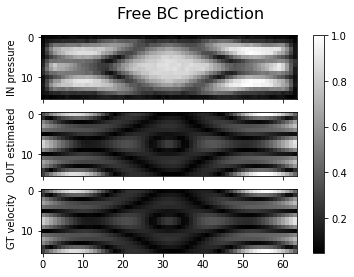

In [140]:
fig = plt.figure()
fig.suptitle("Free BC prediction", fontsize=16)

# IN
ax1 = plt.subplot(3, 1, 1)
first = plt.imshow(X_free_noisy.reshape(16, 64))
plt.ylabel("IN pressure")
plt.gray()

# OUT
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
plt.imshow(OUT_free_noisy.reshape(16, 64))
plt.ylabel("OUT estimated")
plt.gray()

# GT
ax3 = plt.subplot(3, 1, 3, sharex=ax2)
plt.imshow(GT_free.reshape(16, 64))
plt.ylabel("GT velocity")
plt.gray()

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
fig.colorbar(first, ax=[ax1, ax2, ax3])

plt.show()